In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler , LabelEncoder , OneHotEncoder , StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report , precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("ObesityDataSetOriginal.csv")

In [3]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [5]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [6]:
print(df.isnull().sum())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [7]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

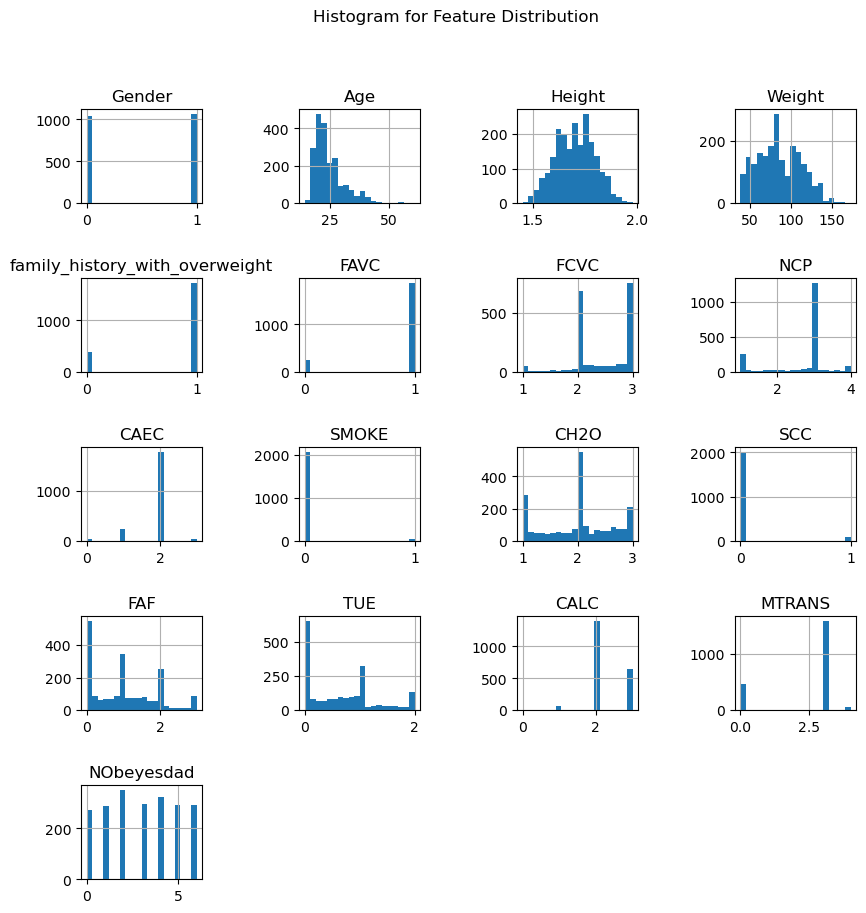

In [8]:
df.hist(figsize=(10, 10), bins=20)
plt.suptitle("Histogram for Feature Distribution")
plt.subplots_adjust(hspace=0.8 , wspace=0.8)
plt.show()

In [9]:
df = df.drop('Weight' , axis=1)
df = df.drop('Height' , axis=1)

In [10]:
X = df.drop('NObeyesdad', axis=1) 
y = df['NObeyesdad']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [81]:
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=21)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=21)

In [82]:
y_pred = dt_model.predict(X_test)

In [83]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7375886524822695
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.86      0.77        56
           1       0.63      0.66      0.65        62
           2       0.70      0.63      0.66        78
           3       0.84      0.90      0.87        58
           4       0.98      1.00      0.99        63
           5       0.71      0.57      0.63        56
           6       0.55      0.54      0.55        50

    accuracy                           0.74       423
   macro avg       0.73      0.74      0.73       423
weighted avg       0.74      0.74      0.73       423

Confusion Matrix:
 [[48  6  0  0  1  1  0]
 [ 9 41  4  0  0  4  4]
 [ 2  6 49  5  0  2 14]
 [ 0  1  2 52  0  2  1]
 [ 0  0  0  0 63  0  0]
 [ 7  7  6  1  0 32  3]
 [ 2  4  9  4  0  4 27]]


In [84]:
feature_importances = dt_model.feature_importances_
features = X.columns 
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

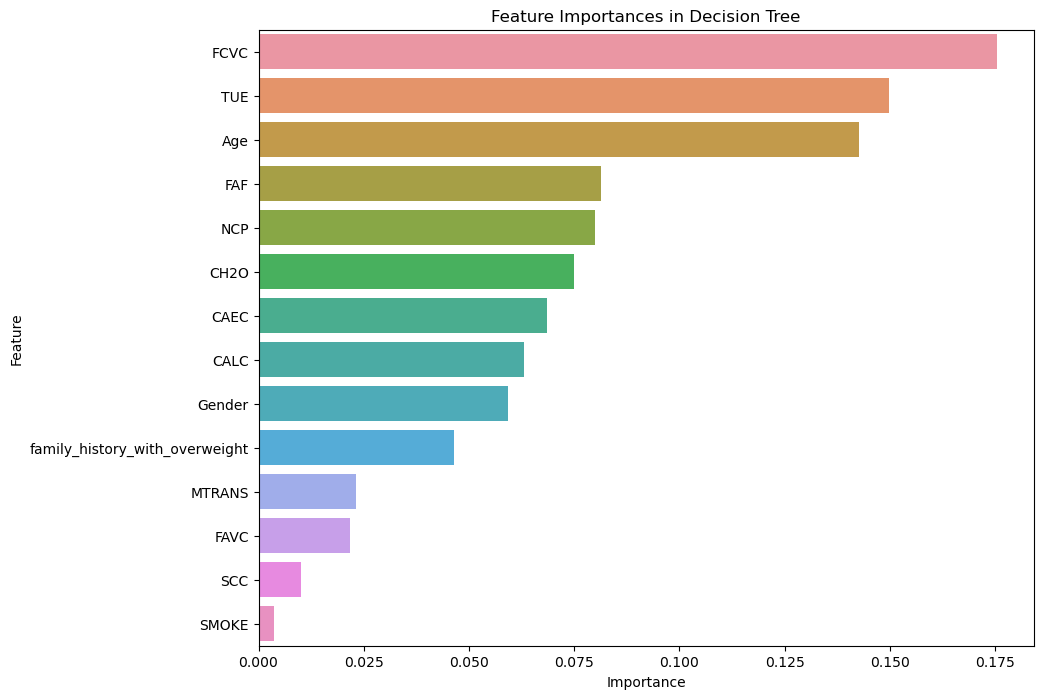

In [85]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importances in Decision Tree")
plt.show()

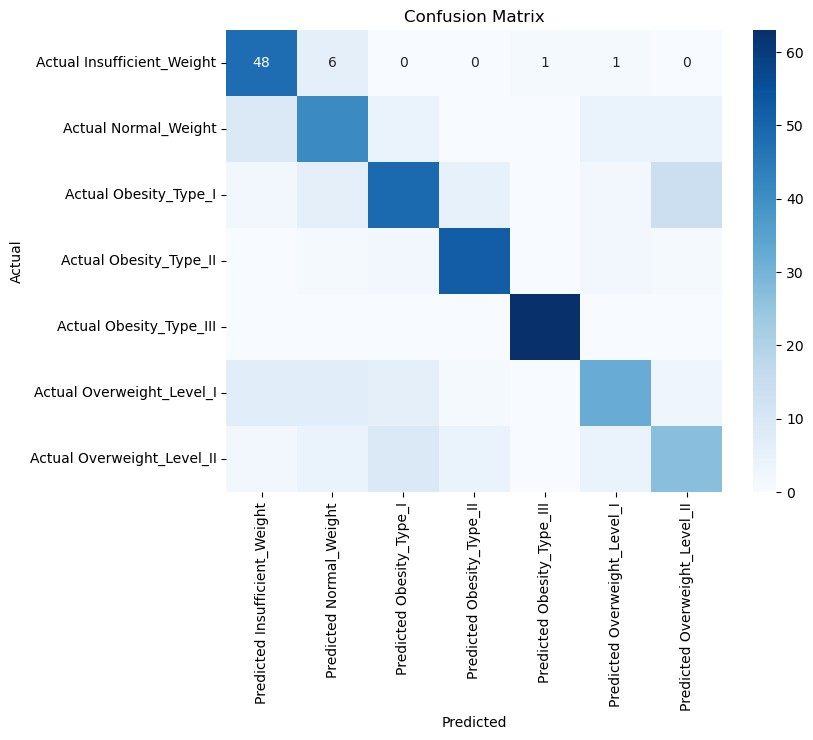

In [90]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues' , xticklabels=['Predicted Insufficient_Weight', 'Predicted Normal_Weight', 'Predicted Obesity_Type_I', 'Predicted Obesity_Type_II', 'Predicted Obesity_Type_III', 'Predicted Overweight_Level_I', 'Predicted Overweight_Level_II'], yticklabels=['Actual Insufficient_Weight', 'Actual Normal_Weight', 'Actual Obesity_Type_I', 'Actual Obesity_Type_II', 'Actual Obesity_Type_III', 'Actual Overweight_Level_I', 'Actual Overweight_Level_II'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [87]:
for column, le in label_encoders.items():
    print(f"Mapping for column: {column}")
    mapping = dict(zip(range(len(le.classes_)), le.classes_))
    print(mapping)


Mapping for column: Gender
{0: 'Female', 1: 'Male'}
Mapping for column: family_history_with_overweight
{0: 'no', 1: 'yes'}
Mapping for column: FAVC
{0: 'no', 1: 'yes'}
Mapping for column: CAEC
{0: 'Always', 1: 'Frequently', 2: 'Sometimes', 3: 'no'}
Mapping for column: SMOKE
{0: 'no', 1: 'yes'}
Mapping for column: SCC
{0: 'no', 1: 'yes'}
Mapping for column: CALC
{0: 'Always', 1: 'Frequently', 2: 'Sometimes', 3: 'no'}
Mapping for column: MTRANS
{0: 'Automobile', 1: 'Bike', 2: 'Motorbike', 3: 'Public_Transportation', 4: 'Walking'}
Mapping for column: NObeyesdad
{0: 'Insufficient_Weight', 1: 'Normal_Weight', 2: 'Obesity_Type_I', 3: 'Obesity_Type_II', 4: 'Obesity_Type_III', 5: 'Overweight_Level_I', 6: 'Overweight_Level_II'}


In [91]:
dt_e_model = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=21)
dt_e_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=21)

In [92]:
y_pred2 = dt_e_model.predict(X_test)

In [100]:
print("entropy criterion\nAccuracy:", accuracy_score(y_test, y_pred2))
print("Classification Report:\n", classification_report(y_test, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))

entropy criterion
Accuracy: 0.7399527186761229
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83        56
           1       0.59      0.63      0.61        62
           2       0.76      0.56      0.65        78
           3       0.86      0.93      0.89        58
           4       0.98      1.00      0.99        63
           5       0.64      0.62      0.63        56
           6       0.52      0.60      0.56        50

    accuracy                           0.74       423
   macro avg       0.74      0.74      0.74       423
weighted avg       0.74      0.74      0.74       423

Confusion Matrix:
 [[48  6  0  0  1  1  0]
 [ 8 39  3  0  0  6  6]
 [ 0  9 44  4  0  8 13]
 [ 0  1  1 54  0  0  2]
 [ 0  0  0  0 63  0  0]
 [ 2  8  3  1  0 35  7]
 [ 1  3  7  4  0  5 30]]


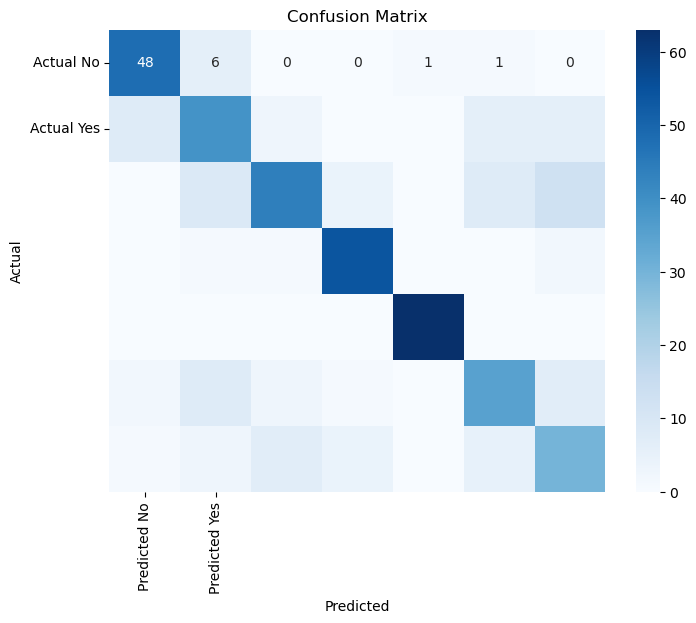

In [94]:
conf_matrix = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [95]:
dt_l_model = DecisionTreeClassifier(criterion='log_loss', max_depth=10, random_state=21)
dt_l_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=10, random_state=21)

In [96]:
y_pred1 = dt_e_model.predict(X_test)

In [99]:
print("Log Loss criterion\nAccuracy:", accuracy_score(y_test, y_pred1))
print("Classification Report:\n", classification_report(y_test, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))

Log Loss criterion
Accuracy: 0.7399527186761229
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83        56
           1       0.59      0.63      0.61        62
           2       0.76      0.56      0.65        78
           3       0.86      0.93      0.89        58
           4       0.98      1.00      0.99        63
           5       0.64      0.62      0.63        56
           6       0.52      0.60      0.56        50

    accuracy                           0.74       423
   macro avg       0.74      0.74      0.74       423
weighted avg       0.74      0.74      0.74       423

Confusion Matrix:
 [[48  6  0  0  1  1  0]
 [ 8 39  3  0  0  6  6]
 [ 0  9 44  4  0  8 13]
 [ 0  1  1 54  0  0  2]
 [ 0  0  0  0 63  0  0]
 [ 2  8  3  1  0 35  7]
 [ 1  3  7  4  0  5 30]]


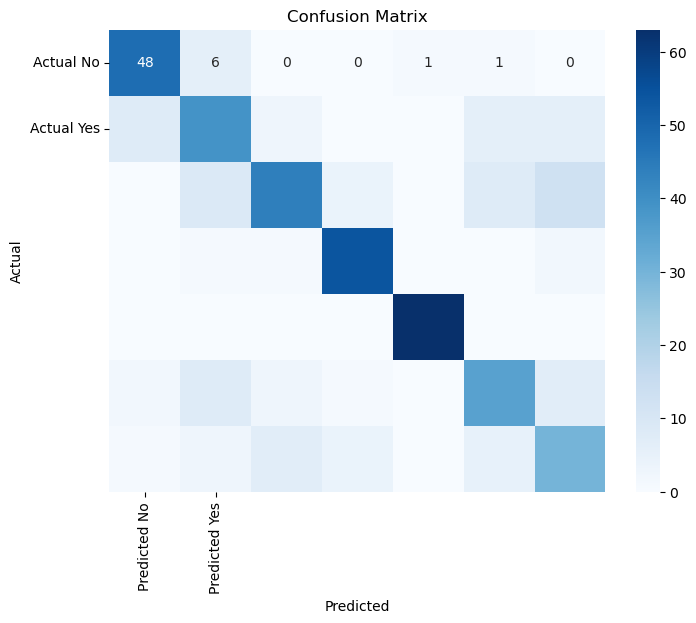

In [98]:
conf_matrix = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()